In [1]:
import $file.scripts.importer

importer.loadProjectDependencies

import $file.$               



In [2]:
import smile.read
import smile.plot._
import smile.util._
import smile.math._, Math._

import smile.data._
import smile.interpolation._
import smile.validation._
import smile.manifold._
import smile.mds._
import smile.projection._

import scala.collection.JavaConverters._
import scala.collection.JavaConversions._
import edu.stanford.math.plex4._
import edu.stanford.math.plex4.api._
import edu.stanford.math.plex4.visualization._
import edu.stanford.math.plex4.homology.barcodes._
import edu.stanford.math.plex4.streams.impl.LazyWitnessStream

import breeze.numerics._
import breeze.linalg._
import breeze.math._
import breeze.stats.{mean, stddev}
import breeze.util.JavaArrayOps

import tda.persistence.Analysis._
import tda.persistence.Math._

def drawBarcodes(images: Seq[java.awt.image.BufferedImage]) = {
  images foreach publish.png 
}

val maxDimension = 3
lazy val persistence = Plex4.getModularSimplicialAlgorithm(maxDimension, 2)

def lazyStreamIntervalsWithImages(data: Array[Array[Double]], scale: Double) = {
  val noLandmarkPoints = 50
  val numDivisions = 100 

  lazy val landmarkSelector = Plex4
    .createMaxMinSelector(data, noLandmarkPoints)

  lazy val landmarkIndices = landmarkSelector.getLandmarkPoints()

  val D = landmarkSelector.getMaxDistanceFromPointsToLandmarks 

  lazy val filtrationValue = scale * D  

  lazy val patchesLandmarksStream = new LazyWitnessStream(
    landmarkSelector.getUnderlyingMetricSpace,
    landmarkSelector,
    maxDimension,
    filtrationValue,
    1,
    numDivisions)

  patchesLandmarksStream.finalizeStream()
  
  (
    patchesLandmarksStream.getSize,
    filtrationValue,
    intervalsWithImages(
      patchesLandmarksStream,
      maxDimension,
      filtrationValue,
      persistence)  
  )
}

import smile.read

import smile.plot._

import smile.util._

import smile.math._, Math._


import smile.data._

import smile.interpolation._

import smile.validation._

import smile.manifold._

import smile.mds._

import smile.projection._


import scala.collection.JavaConverters._

import scala.collection.JavaConversions._

import edu.stanford.math.plex4._

import edu.stanford.math.plex4.api._

import edu.stanford.math.plex4.visualization._

import edu.stanford.math.plex4.homology.barcodes._

import edu.stanford.math.plex4.streams.impl.LazyWitnessStream


import breeze.numerics._

import breeze.linalg._

import breeze.math._

import breeze.stats.{mean, stddev}

import breeze.util.JavaArrayOps


import tda.persistence.Analysis._

import tda.persistence.Math._


defined function drawBarcodes
maxDimension: Int = 3
persistence: edu.stanford.math.plex4.homology.interfaces.AbstractPersistenceAlgorithm[edu.stanford.math.plex4.homology.chain_basis.Simplex] = <lazy>
defined function lazyStream

# Range image patches

data comes from [On the non-linear statistics of range image patches](https://pdfs.semanticscholar.org/dde7/e2562efd53a7137535aec9389d252bafeb25.pdf)

It is also available as 

In [3]:
val data = read.csv("../data/pointsRange.csv").unzip

data: Array[Array[Double]] = Array(
  Array(
    0.2803111772746603,
    0.1246321673633129,
    -0.01992691326865255,
    -0.1400221494859777,
    -0.28013325840619036,
    0.27586320556290755,
    0.14242405421032403,
    -0.015478941556899767,
    -0.15559005047711244,
    -0.2756852866944376,
...

In [4]:
lazy val (streamSize, filtrationValue, (_, patcheslandmarkImages)) = lazyStreamIntervalsWithImages(data, 1.0/3)

streamSize: Int = <lazy>
filtrationValue: Double = <lazy>
patcheslandmarkImages: List[java.awt.image.BufferedImage] = <lazy>

In [5]:
println(Seq(
  "Image patches stream for",
  s"maxFiltrationValue = ${filtrationValue}",
  s"has ${streamSize} simplices").mkString("\n"))

Image patches stream for
maxFiltrationValue = 0.2528713933036651
has 8523 simplices


As we can see data consequently shows topological properties of a circle.

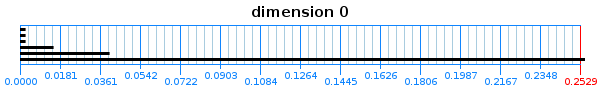

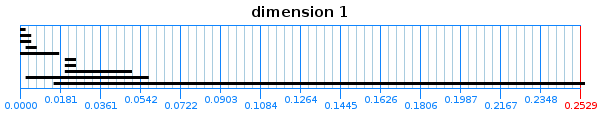

In [6]:
drawBarcodes(patcheslandmarkImages)

We retrieve 1000 samples by maxmin selection to speed up reduction dimension computations.

The following analysis shows that these samples have very similar topological properties.

In [7]:
val subsampledData = subsampleByMaxmin(1000, data) 
// val lled = lle(sliced, d = 2, k = 5)
// val reducedData = lled.getCoordinates

subsampledData: Array[Array[Double]] = Array(
  Array(
    -0.240254728289288,
    -0.2408648215556397,
    -0.24208500808834302,
    -0.24391528788739802,
    -0.24452538115374972,
    -0.22378221009779292,
    -0.23049323602766128,
    -0.23354370235941965,
    -0.23598407542482633,
    -0.23781435522388134,
...

In [8]:
lazy val (sampledPatchesStreamSize, sampledFiltrationValue, (_, sampledPatchesLandmarkImages))= lazyStreamIntervalsWithImages(data, 1.0/3)

sampledPatchesStreamSize: Int = <lazy>
sampledFiltrationValue: Double = <lazy>
sampledPatchesLandmarkImages: List[java.awt.image.BufferedImage] = <lazy>

In [9]:
println(Seq(
  "Image patches stream for",
  s"maxFiltrationValue = ${sampledFiltrationValue}",
  s"has ${sampledPatchesStreamSize} simplices").mkString("\n"))

Image patches stream for
maxFiltrationValue = 0.26364323424136643
has 14186 simplices


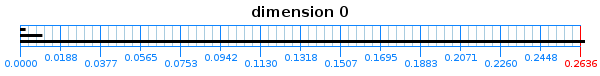

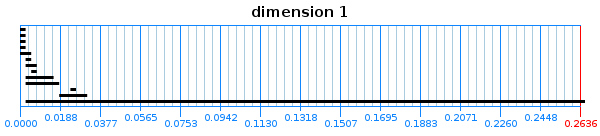

In [10]:
drawBarcodes(sampledPatchesLandmarkImages)

## LLE

In [59]:
val lle_ = lle(subsampledData, d = 2, k = 5)
lazy val lleReducedData = lle_.getCoordinates 

lle_: LLE = smile.manifold.LLE@1cb4dfd

In [61]:
lazy val (lleStreamSize, lleFiltrationValue, (_, llePatcheslandmarkImages)) =
  lazyStreamIntervalsWithImages(lleReducedData, 10)

lleStreamSize: Int = <lazy>
lleFiltrationValue: Double = <lazy>
llePatcheslandmarkImages: List[java.awt.image.BufferedImage] = <lazy>

In [62]:
println(Seq(
  "Image patches stream for",
  s"maxFiltrationValue = ${lleFiltrationValue}",
  s"has ${lleStreamSize} simplices").mkString("\n"))

Image patches stream for
maxFiltrationValue = 0.0328288500731166
has 18895 simplices


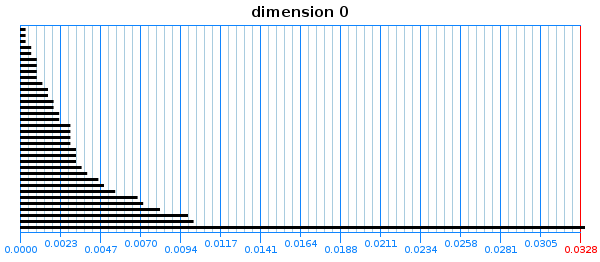

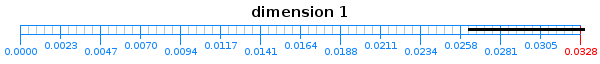

In [63]:
drawBarcodes(llePatcheslandmarkImages)

## Isomap 

In [36]:
val isomap_ = isomap(subsampledData, d = 2, k = 5)
lazy val isomapReducedData = isomap_.getCoordinates

isomap_: IsoMap = smile.manifold.IsoMap@2779fc89
isomapReducedData: Array[Array[Double]] = Array(
  Array(1.2876214565407114, -4.626003585041811),
  Array(0.9415468449308723, 5.736841750767042),
  Array(-5.1699114643462725, -0.8475996880263287),
  Array(7.0146814868478415, -0.6372158297668994),
  Array(5.400999932045947, -3.124649695898849),
  Array(6.29636266686044, 1.3517676463843795),
  Array(-2.260277890077621, 1.809290702602372),
  Array(1.224941882245234, -5.3263620326493655),
  Array(-1.2852537985065744, 6.10208653337464),
  Array(-1.468380196125186, -3.328483307288799),
  Array(7.071767122925353, -0.1886335274181754),
...

In [37]:
lazy val (isomapStreamSize, isomapFiltrationValue, (_, isomapPatcheslandmarkImages)) =
  lazyStreamIntervalsWithImages(isomapReducedData, 3)

isomapStreamSize: Int = <lazy>
isomapFiltrationValue: Double = <lazy>
isomapPatcheslandmarkImages: List[java.awt.image.BufferedImage] = <lazy>

In [38]:
println(Seq(
  "Image patches stream for",
  s"maxFiltrationValue = ${isomapFiltrationValue}",
  s"has ${isomapStreamSize} simplices").mkString("\n"))

Image patches stream for
maxFiltrationValue = 2.868983980338815
has 10915 simplices


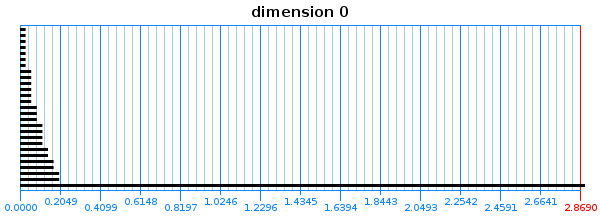

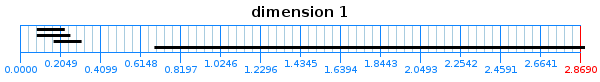

In [39]:
drawBarcodes(isomapPatcheslandmarkImages)